Implementation of policy iteration algorithm

Consider a 4 x 4 grid as shown in Figure 1. Start state S is located at the bottom left, and the target
state T is at the bottom right and top right with a reward of +2 and –2, respectively. All other states
have a reward of -1. Possible actions of MDP are to move left, right, up, or down. Assume the
environment is stochastic. The transition probabilities are shown in Figure 1.
a. Implement policy iteration algorithm to find the optimal policy
b. Check the convergence of the algorithm (how many iterations?)
c. Modify the state transition probability matrix by applying uniform random policy (0.25 for all
four actions)

a. Implement policy iteration algorithm to find the optimal policy  
b. Check the convergence of the algorithm (how many iterations?)  
c. Modify the state transition probability matrix by applying uniform random policy (0.25 for all
four actions)  


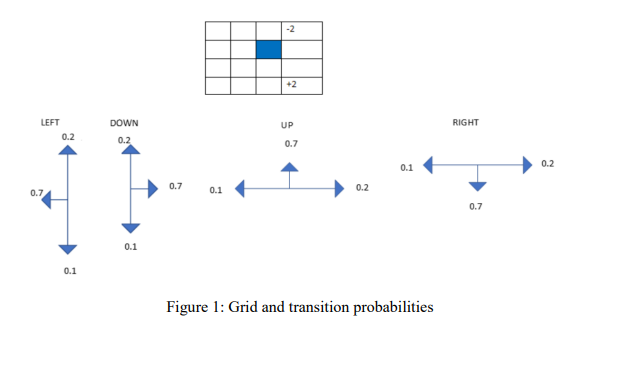

**Import Libraries**

In [43]:
import numpy as np

**Initial**

**c. Modify the state transition probability matrix by applying uniform random policy (0.25 for all four actions)**

In [44]:
small_enough = 0.005
gamma = 0.9         
noise = 0.1  
#Define all states
all_states=[]
for i in range(4):
    for j in range(4):
            all_states.append((i,j))

In [45]:
all_states

[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (1, 0),
 (1, 1),
 (1, 2),
 (1, 3),
 (2, 0),
 (2, 1),
 (2, 2),
 (2, 3),
 (3, 0),
 (3, 1),
 (3, 2),
 (3, 3)]

In [46]:
#Rewards for each
rewards = {}
for state in all_states:
    if state == (0,3):
        rewards[state] = +2
    elif state == (3,3):
        rewards[state] = -2
    elif state == (2,2):
        rewards[state] = 0
    else:
        rewards[state] =-1


In [47]:
rewards

{(0, 0): -1,
 (0, 1): -1,
 (0, 2): -1,
 (0, 3): 2,
 (1, 0): -1,
 (1, 1): -1,
 (1, 2): -1,
 (1, 3): -1,
 (2, 0): -1,
 (2, 1): -1,
 (2, 2): 0,
 (2, 3): -1,
 (3, 0): -1,
 (3, 1): -1,
 (3, 2): -1,
 (3, 3): -2}

In [48]:
#Possible actions
actions = {
    (0,0):('U', 'R'), 
    (0,1):('U', 'R', 'L'),    
    (0,2):('U', 'L', 'R'),
    (0,3):('U', 'L'),
    (1,0):('D', 'U', 'R'),
    (1,1):('D', 'R', 'L', 'U'),
    (1,2):('D', 'L', 'R'),
    (1,3):('U', 'L', 'D'),
    (2,0):('U', 'D', 'R'),
    (2,1):('U', 'D', 'L'),
    (2,3):('U', 'D'),
    (3,0):('D', 'R'),
    (3,1):('L', 'D', 'R'),
    (3,2):('L', 'R'),
    (3,3):('D', 'L'),
    }

In [49]:
actions

{(0, 0): ('U', 'R'),
 (0, 1): ('U', 'R', 'L'),
 (0, 2): ('U', 'L', 'R'),
 (0, 3): ('U', 'L'),
 (1, 0): ('D', 'U', 'R'),
 (1, 1): ('D', 'R', 'L', 'U'),
 (1, 2): ('D', 'L', 'R'),
 (1, 3): ('U', 'L', 'D'),
 (2, 0): ('U', 'D', 'R'),
 (2, 1): ('U', 'D', 'L'),
 (2, 3): ('U', 'D'),
 (3, 0): ('D', 'R'),
 (3, 1): ('L', 'D', 'R'),
 (3, 2): ('L', 'R'),
 (3, 3): ('D', 'L')}

In [50]:
#initial policy
policy={}
for action in actions.keys():
    policy[action] = np.random.choice(actions[action])

In [51]:
policy

{(0, 0): 'U',
 (0, 1): 'L',
 (0, 2): 'U',
 (0, 3): 'L',
 (1, 0): 'R',
 (1, 1): 'R',
 (1, 2): 'R',
 (1, 3): 'U',
 (2, 0): 'R',
 (2, 1): 'U',
 (2, 3): 'U',
 (3, 0): 'D',
 (3, 1): 'R',
 (3, 2): 'L',
 (3, 3): 'D'}

In [52]:
#Define initial value function 
value={}
for state in all_states:
    if state in actions.keys():
        value[state] = -1
    if state ==(0,3):
        value[state]= +2
    if state == (2,2):
       value[state]= 0    
    if state == (3,3):
        value[state]=-2
    

In [53]:
value

{(0, 0): -1,
 (0, 1): -1,
 (0, 2): -1,
 (0, 3): 2,
 (1, 0): -1,
 (1, 1): -1,
 (1, 2): -1,
 (1, 3): -1,
 (2, 0): -1,
 (2, 1): -1,
 (2, 2): 0,
 (2, 3): -1,
 (3, 0): -1,
 (3, 1): -1,
 (3, 2): -1,
 (3, 3): -2}

**a. Implement policy iteration algorithm to find the optimal policy**

In [54]:
iteration = 0
while True:
    biggest_change = 0
    for s in all_states:
        if s in policy:

            old_v = value[s]
            new_v = 0

            for a in actions[s]:
                if a == 'U':
                    nxt = [s[0]+1, s[1]]
                if a == 'D':
                    nxt = [s[0]-1, s[1]]
                if a == 'L':
                    nxt = [s[0], s[1]-1]
                if a == 'R':
                    nxt = [s[0], s[1]+1]

          
                random_1=np.random.choice([i for i in actions[s] if i != a])
                if random_1 == 'U':
                    act = [s[0]+1, s[1]]
                if random_1 == 'D':
                    act = [s[0]-1, s[1]]
                if random_1 == 'L':
                    act = [s[0], s[1]-1]
                if random_1 == 'R':
                    act = [s[0], s[1]+1]

              
                nxt = tuple(nxt)
                act = tuple(act)
                v = rewards[s] + (gamma * ((1-noise)* value[nxt] + (noise * value[act])))
                if v > new_v: 
                    new_v = v
                    policy[s] = a

   
            value[s] = new_v
            biggest_change = max(biggest_change, np.abs(old_v - value[s]))

  
    if biggest_change < small_enough:
        break
    iteration += 1

In [55]:
value

{(0, 0): 0,
 (0, 1): 1.1922829246268707,
 (0, 2): 2.6945592566919907,
 (0, 3): 4.42505052465771,
 (1, 0): 0,
 (1, 1): 0.07305463216418362,
 (1, 2): 1.1891679148152892,
 (1, 3): 2.690681521629875,
 (2, 0): 0,
 (2, 1): 0,
 (2, 2): 0,
 (2, 3): 1.179452032520199,
 (3, 0): 0,
 (3, 1): 0,
 (3, 2): 0,
 (3, 3): 0}

In [56]:
policy

{(0, 0): 'R',
 (0, 1): 'R',
 (0, 2): 'R',
 (0, 3): 'L',
 (1, 0): 'R',
 (1, 1): 'R',
 (1, 2): 'D',
 (1, 3): 'D',
 (2, 0): 'R',
 (2, 1): 'U',
 (2, 3): 'D',
 (3, 0): 'D',
 (3, 1): 'R',
 (3, 2): 'L',
 (3, 3): 'D'}

**b.Check the convergence of the algorithm (how many iterations?)**

In [57]:
iteration

880